# Libraries

In [10]:
pip install -U imbalanced-learn


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/6e/1b/66764ecf370e797759be06fb38c11640ea1f9456ae10f8640a33cfa726ea/imbalanced_learn-0.12.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ------ -------------------------------- 41.0/258.0 kB 960.0 kB/s eta 0:00:01
   ---------------------- ----------------- 143.4/258.0 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


# Load the dataset

In [2]:
import pandas as pd 
data=pd.read_csv("gun-violence-data_01-2013_03-2018.csv")
#data.head()
data= data.sample(n=23000, random_state=42)
data.to_csv("data.csv", index=False)

## Columns

In [3]:
cols=data.columns.tolist()
cols

['incident_id',
 'date',
 'state',
 'city_or_county',
 'address',
 'n_killed',
 'n_injured',
 'incident_url',
 'source_url',
 'incident_url_fields_missing',
 'congressional_district',
 'gun_stolen',
 'gun_type',
 'incident_characteristics',
 'latitude',
 'location_description',
 'longitude',
 'n_guns_involved',
 'notes',
 'participant_age',
 'participant_age_group',
 'participant_gender',
 'participant_name',
 'participant_relationship',
 'participant_status',
 'participant_type',
 'sources',
 'state_house_district',
 'state_senate_district']

In [ ]:
new_data = pd.DataFrame(data)
col_info=new_data.dtypes
print(col_info)

incident_id                      int64
date                            object
state                           object
city_or_county                  object
address                         object
n_killed                         int64
n_injured                        int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
congressional_district         float64
gun_stolen                      object
gun_type                        object
incident_characteristics        object
latitude                       float64
location_description            object
longitude                      float64
n_guns_involved                float64
notes                           object
participant_age                 object
participant_age_group           object
participant_gender              object
participant_name                object
participant_relationship        object
participant_status              object
participant_type         

## Handle missing data (imputation, dropping rows/columns)

*Imputation*

In [5]:
numCols = ['n_killed', 'n_injured', 'latitude', 'longitude', 'n_guns_involved']
data[numCols] = data[numCols].fillna(data[numCols].mean())
catCols = ['state', 'city_or_county', 'gun_stolen', 'gun_type', 'incident_characteristics']
data[catCols] = data[catCols].fillna(data[catCols].mode().iloc[0])

*Dropping Column*

In [6]:
dfDropna = data.dropna()
dfDropnaColumns = data.dropna(axis=1)

Result

In [6]:
print("Summary statistics after handling missing data:")
print("Number of rows before dropping:", len(data))
print("Number of rows after dropping:", len(dfDropna))
print("Number of columns before dropping:", len(data.columns))
print("Number of columns after dropping:", len(dfDropnaColumns.columns))

Summary statistics after handling missing data:
Number of rows before dropping: 23000
Number of rows after dropping: 116
Number of columns before dropping: 29
Number of columns after dropping: 14


## Encode categorical variables (one-hot encoding, label encoding) (A)

One-hot encoding

In [12]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder with sparse=True
encoder = OneHotEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = encoder.fit_transform(data[column].astype(str))
data.head()

,incident_id,date,state,city_or_county,address,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,...,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,n_killed,n_injured
0,875588,1296,46,3117,8085,20055,4704,False,3.0,42,...,65,11179,111,18,36,4644,69.0,16.0,0,1
1,690013,1060,43,67,7493,16172,13151,False,13.0,42,...,99,5374,111,350,37,13215,87.0,31.0,1,0
2,758027,1144,40,632,3682,17542,345,False,1.0,42,...,117,4828,111,159,38,19145,119.0,41.0,0,1
3,173858,251,42,643,1352,4265,16754,False,3.0,42,...,256,10574,111,613,38,16604,28.0,10.0,0,0
4,419030,657,38,2903,12880,10207,84,False,1.0,42,...,65,11179,111,201,36,64,NaN,NaN,1,0


Label encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column].astype(str))
data.head()

,incident_id,date,state,city_or_county,address,incident_url,source_url,incident_url_fields_missing,congressional_district,gun_stolen,...,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,n_killed,n_injured
0,875588,1296,46,3117,8085,20055,4704,False,3.0,42,...,65,11179,111,18,36,4644,69.0,16.0,0,1
1,690013,1060,43,67,7493,16172,13151,False,13.0,42,...,99,5374,111,350,37,13215,87.0,31.0,1,0
2,758027,1144,40,632,3682,17542,345,False,1.0,42,...,117,4828,111,159,38,19145,119.0,41.0,0,1
3,173858,251,42,643,1352,4265,16754,False,3.0,42,...,256,10574,111,613,38,16604,28.0,10.0,0,0
4,419030,657,38,2903,12880,10207,84,False,1.0,42,...,65,11179,111,201,36,64,NaN,NaN,1,0


## Exploratory Data Analysis (A)

Data visualization (distributions, correlations, spatial/temporal patterns)

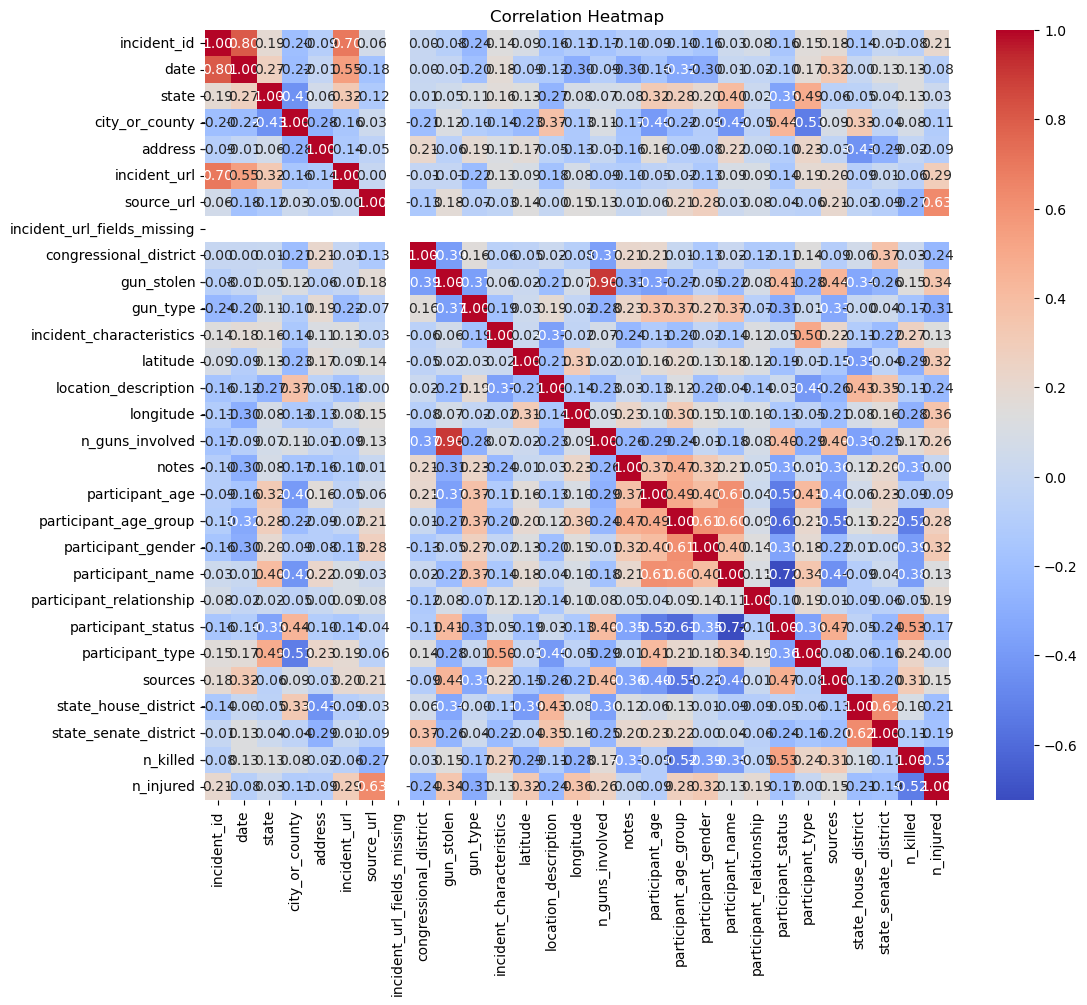

In [20]:
#visualizing the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
cormat = data.corr()
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cormat, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


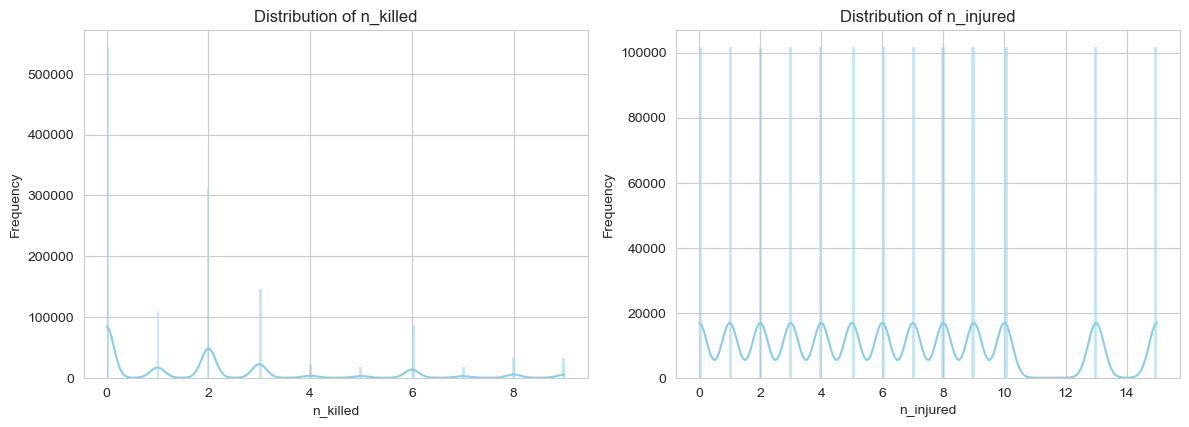

In [24]:
numerical_cols = ['n_killed', 'n_injured']

# Plot distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


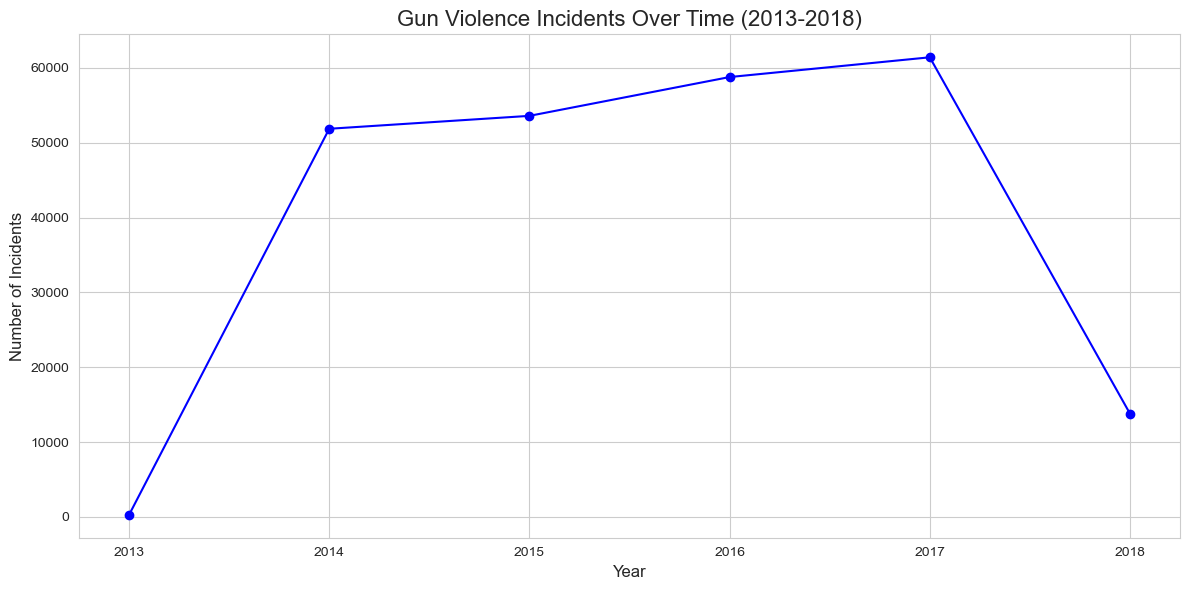

In [45]:

#plotting temporal patterns 
import pandas as pd
import matplotlib.pyplot as plt
our_data=pd.read_csv("gun-violence-data_01-2013_03-2018.csv")
#using our data without the label encoding done on it 

numCols = ['n_killed', 'n_injured', 'latitude', 'longitude', 'n_guns_involved']
our_datacatCols = ['state', 'city_or_county', 'gun_stolen', 'gun_type', 'incident_characteristics']
our_data[catCols] = our_data[catCols].fillna(our_data[catCols].mode().iloc[0])
dfDropna_temp = our_data.dropna()
dfDropnaColumns_temp = our_data.dropna(axis=1)

#extracting months and year from the date column
our_data['date'] = pd.to_datetime(our_data['date'], errors='coerce') #converting to date time format

our_data['year_month'] = our_data['date'].dt.to_period('M')

#the data is large therer visiualizing on the bases of year only 
yearly_incidents = our_data['year_month'].dt.year.value_counts().sort_index()


plt.figure(figsize=(12, 6))
x_labels = [str(year) for year in yearly_incidents.index]

plt.plot(x_labels, yearly_incidents.values, marker='o', linestyle='-', color='blue')

plt.title('Gun Violence Incidents Over Time (2013-2018)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.grid(True)
plt.xticks() 

# Show plot
plt.tight_layout()
plt.show()


## Regression models (logistic) (A)

Model Training

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report


# Handle missing values because data has nan even after label encoding 
imputer = SimpleImputer(strategy='mean') 
X_imputed = imputer.fit_transform(data.drop('n_killed', axis=1))
X = pd.DataFrame(X_imputed, columns=data.drop('n_killed', axis=1).columns)

y = data['n_killed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


y_pred = logistic_model.predict(X_test)


C:\Users\Anam 353\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evauluation

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:") # this will give us all the measures e.g. precision recall etc
print(classification_report(y_test, y_pred))


Accuracy: 0.7297363640826746
Classification Report:


C:\Users\Anam 353\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anam 353\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.77      0.90      0.83    109019
           1       0.95      0.12      0.22     22279
           2       0.60      0.68      0.64     62335
           3       0.75      0.89      0.82     29056
           4       0.00      0.00      0.00      4329
           5       0.00      0.00      0.00      3567
           6       0.84      1.00      0.92     17204
           7       0.00      0.00      0.00      3620
           8       0.91      1.00      0.95      6735
           9       0.00      0.00      0.00      6653

    accuracy                           0.73    264797
   macro avg       0.48      0.46      0.44    264797
weighted avg       0.70      0.73      0.68    264797



C:\Users\Anam 353\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hyper Parameter Tuning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

X = data.drop('n_injured', axis=1)
y = data['n_injured']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())  
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])


In [ ]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


In [ ]:

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error with tuned Logistic Regression:", mse)


## Tree-based models (gradient boosting) (a)

Model Training

In [52]:
data_1=pd.read_csv("gun-violence-data_01-2013_03-2018.csv")
data_1.head()
data_1= data_1.sample(n=23000, random_state=42)
data_1.to_csv("data.csv", index=False)

numCols = ['n_killed', 'n_injured', 'latitude', 'longitude', 'n_guns_involved']
data_1[numCols] = data_1[numCols].fillna(data_1[numCols].mean())
catCols = ['state', 'city_or_county', 'gun_stolen', 'gun_type', 'incident_characteristics']
data_1[catCols] = data_1[catCols].fillna(data_1[catCols].mode().iloc[0])

dfDropna_1 = data_1.dropna()
dfDropnaColumns_1 = data_1.dropna(axis=1)

In [53]:
from imblearn.over_sampling import RandomOverSampler
X = data_1.drop(['n_killed',], axis=1)  # Assuming 'n_killed' and 'n_injured' are the target variables
y = data_1[['n_killed']]
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)
data_1 = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['n_killed'])], axis=1)

from imblearn.over_sampling import RandomOverSampler
X = data_1.drop(['n_injured',], axis=1)  # Assuming 'n_killed' and 'n_injured' are the target variables
y = data_1[['n_injured']]
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)
data_1 = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['n_injured'])], axis=1)


In [56]:
print("Class imbalance for 'n_killed':")
print(data_1['n_killed'].value_counts())
print("\nClass imbalance for 'n_injured':")
print(data_1['n_injured'].value_counts())

Class imbalance for 'n_killed':
0    544776
2    312152
3    145430
1    110023
6     87216
8     33655
9     33266
4     21817
5     17825
7     17825
Name: n_killed, dtype: int64

Class imbalance for 'n_injured':
1     101845
0     101845
2     101845
3     101845
4     101845
15    101845
6     101845
7     101845
5     101845
9     101845
8     101845
10    101845
13    101845
Name: n_injured, dtype: int64


In [57]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
data_1.dropna(inplace=True)
# Drop irrelevant columns
X = data_1.drop(['incident_id', 'date', 'state', 'city_or_county', 'address', 'incident_url', 'source_url',
             'incident_url_fields_missing', 'notes', 'sources', 'participant_name'], axis=1)
X = pd.get_dummies(X)
y = data_1['n_killed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=5)
gradientBoostingModel = GradientBoostingClassifier()
# Model Training
gradientBoostingModel.fit(X_train, y_train)

GradientBoostingClassifier()

Evaluation

In [58]:
from sklearn.metrics import accuracy_score
y_pred = gradientBoostingModel.predict(X_test)
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


Hyper Parameter Tuning

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data.dropna(inplace=True)
# Drop irrelevant columns
X = data_1.drop(['incident_id', 'date', 'state', 'city_or_county', 'address', 'incident_url', 'source_url',
             'incident_url_fields_missing', 'notes', 'sources', 'participant_name'], axis=1)
X = pd.get_dummies(X)
y = data_1['n_killed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gradientBoostingModel = GradientBoostingClassifier(max_depth=3,subsample = 0.8,n_estimators = 200,learning_rate = 0.05)
# Model Training with hyper parameterss
gradientBoostingModel.fit(X_train, y_train)

y_pred = gradientBoostingModel.predict(X_test)
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


## Clustering algorithms (hierarchical) (A)

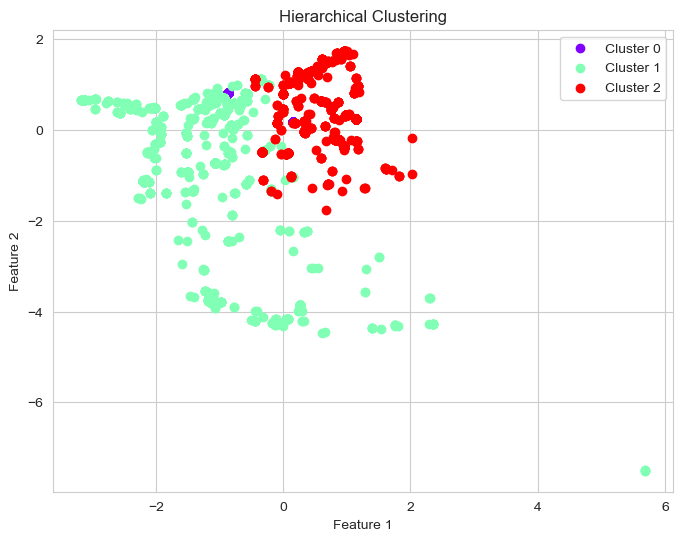

In [68]:
#this code works for 500 rowws 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

features = ['latitude', 'longitude', 'n_killed', 'n_injured']
scaler = StandardScaler()
X = scaler.fit_transform(data[features])

agg_clustering = AgglomerativeClustering(n_clusters=3)  
clusters = agg_clustering.fit_predict(X)


plt.figure(figsize=(8, 6))
unique_clusters = np.unique(clusters)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_clusters)))#using colors for better visualization

for cluster, color in zip(unique_clusters, colors):
    plt.scatter(X[clusters == cluster, 0], X[clusters == cluster, 1], color=color, label=f'Cluster {cluster}')

plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


## Validation and Refinement (a)

Cross-validation techniques (k-fold cross-validation)

In [85]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
#using this imputer method to change the instances whwre we had nan in the data or we are handling missing values here 
missing_vals = SimpleImputer(strategy='mean')
temp = missing_vals.fit_transform(data.drop('n_killed', axis=1))

#using n)killed as the target variable here 
X = pd.DataFrame(temp, columns=data.drop('n_killed', axis=1).columns)
y = data['n_killed']
k = 5

#using the logistic regression model 
model = LogisticRegression(penalty='l2', C=1.0)


kf = KFold(n_splits=k, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
   
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    print("Accuracy:", accuracy)


C:\Users\Anam 353\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy: 0.7297363640826746


C:\Users\Anam 353\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy: 0.7282786436402225


C:\Users\Anam 353\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy: 0.7923541429850036


C:\Users\Anam 353\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy: 0.7426028240501215


C:\Users\Anam 353\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy: 0.7685623326548261
